<a href="https://colab.research.google.com/github/nakib103/pancancer_classification/blob/master/analyze_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import model_from_json, load_model
from keras.utils import to_categorical
import keras.backend as K

from sklearn.metrics import confusion_matrix

In [ ]:
# run this cell to mount your Google Drive.

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# load model

model = load_model("/content/drive/My Drive/results/model_with_weights_2D_3.h5")

In [ ]:
# load data and label

data = np.load("/content/drive/My Drive/data/data_np_2D.npy")
label = np.load("/content/drive/My Drive/data/label_np_2D.npy")

In [ ]:
# get output of specific layer


layer_output = np.empty((11069, 512))

layer = 12
start = 0
for end in range(1000, 12000, 1000):
  if end > 11069:
    end = 11069
    
  func = K.function([model.input, K.learning_phase()], [model.layers[layer].output])
  output = func([data[start:end], 0])
  
  layer_output[start:end] = output[0]  
  
  start = end  

In [ ]:
# save output of specific layer

layer_output
np.save("/content/drive/My Drive/data/layer_12_output.npy", layer_output)

In [ ]:
# predict the output

y_pred = model.predict(data, verbose=1)
y_pred

11069/11069 [==============================] - 360s 33ms/step


array([[5.27423865e-04, 4.28401741e-08, 1.00669038e-08, ...,
        2.24736795e-07, 2.59314875e-05, 6.78670915e-07],
       [9.52224077e-09, 7.14516545e-07, 2.24616798e-07, ...,
        2.46805754e-09, 8.58718041e-10, 3.08859582e-09],
       [1.04928404e-07, 6.70369191e-05, 3.87348655e-06, ...,
        5.74971409e-07, 2.10707199e-07, 6.87209592e-07],
       ...,
       [1.60139552e-05, 1.73251668e-04, 8.66371214e-01, ...,
        9.23106054e-05, 2.41656198e-05, 2.37812014e-06],
       [1.77317111e-06, 2.41653039e-03, 7.49840092e-06, ...,
        8.60989360e-07, 2.88076166e-07, 5.95631661e-07],
       [6.33533404e-08, 1.55880201e-07, 8.00211978e-07, ...,
        2.96318831e-07, 9.91560754e-08, 4.43739168e-07]], dtype=float32)

In [ ]:
# create confusion matrix

matrix = confusion_matrix(label.argmax(axis=1), y_pred.argmax(axis=1))

In [ ]:
# check outputs

print(label.argmax(axis=1))
print(y_pred.argmax(axis=1))

[26 14 14 ...  3  5 22]
[26 14 14 ...  2  5 22]


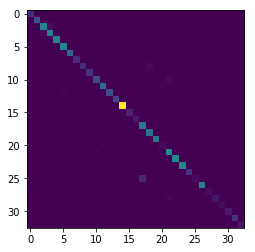

In [ ]:
# plot confusion matrix

plt.imshow(matrix)
plt.show()